# Задача регрессии

### Выбор предметной области 

В качестве предметной области мной была выбрана задача оценки расходов на медицину. Мною был взят [следующий датасет](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance) с Kaggle. В нём представлена информация: 
- пол, 
- возраст, 
- индекс массы тела, 
- количество детей, 
- курит ли человек,
- регион проживания,
- траты на медицину. 

По данным о человеке постараемся оценить его расходы на медицину. Это может быть полезно людям без страховки, которые планируют оценить затраты при оформлении страховки.

### Выбор метрик качества

Для задачи классификации я выбрала метрики MSE и R2-score. Квадрат отклонения увеличивает влияние больших ошибок, что делает эту метрику полезной для задач, где крупные отклонения крайне нежелательны, чтобы избежать существенных потерь.

R2-score (коэффициент детерминации) буду использовать для оценки общей точности модели.



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import opendatasets as od

url = 'https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance'  
od.download(url)

Skipping, found downloaded files in ".\healthcare-insurance" (use force=True to force download)


In [2]:
data_path = './healthcare-insurance/insurance.csv' 
data = pd.read_csv(data_path)

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Создание бейзлайна

In [3]:
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data['charges'] = data['charges'].apply(round)

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16885
1,18,1,33.770,1,0,2,1726
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3867
5,31,0,25.740,0,0,2,3757
6,46,0,33.440,1,0,2,8241
7,37,0,27.740,3,0,1,7282
8,37,1,29.830,2,0,0,6406
9,60,0,25.840,0,0,1,28923


In [4]:
X = data.drop('charges', axis=1)
Y = data['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### KNN

In [5]:
modelKNN = KNeighborsRegressor(n_neighbors=100)
modelKNN.fit(X_train, Y_train)
Y_pred = modelKNN.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred))
print("R^2 score:", r2_score(Y_test, Y_pred))

MSE error: 132220020.5628306
R^2 score: 0.14833149669983492


### Логистическая регрессия

In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
     
modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred2))
print("R^2 score:", r2_score(Y_test, Y_pred2))

MSE error: 121180129.39179105
R^2 score: 0.2194427213858725


### Линейная регрессия

In [7]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = modelLinearRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred3))
print("R^2 score:", r2_score(Y_test, Y_pred3))

MSE error: 33634917.01004699
R^2 score: 0.7833474892332242


### Решающее дерево

In [8]:
from sklearn.tree import DecisionTreeRegressor

modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred4))
print("R^2 score:", r2_score(Y_test, Y_pred4))

MSE error: 38032726.13059702
R^2 score: 0.7550198918273622


### Случайный лес

In [9]:
from sklearn.ensemble import RandomForestRegressor

modelRandomForest = RandomForestRegressor(n_estimators=100, random_state=42)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred5))
print("R^2 score:", r2_score(Y_test, Y_pred5))

MSE error: 21301763.13335078
R^2 score: 0.8627890039026697


### Градиентный бустинг

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

modelGradientBoosting = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, random_state=42)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred6))
print("R^2 score:", r2_score(Y_test, Y_pred6))

MSE error: 22172683.640710697
R^2 score: 0.8571791457144826


# Улучшение бейзлайна

Выполню визуализацию данных и их препроцессинг.

In [11]:
data_path = './healthcare-insurance/insurance.csv' 
data = pd.read_csv(data_path)

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data['charges'] = data['charges'].apply(round)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 73.3 KB


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

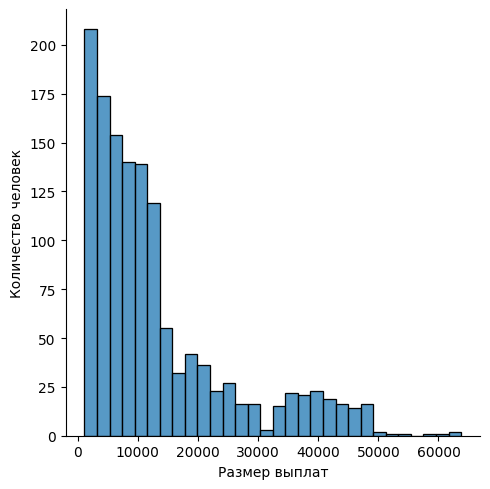

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data['charges'])
plt.ylabel("Количество человек")
plt.xlabel("Размер выплат")
plt.show()

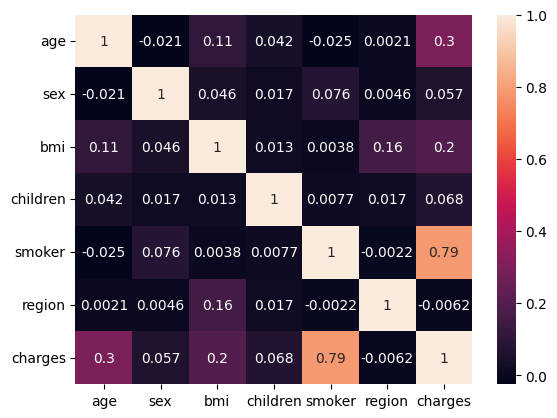

In [15]:
sns.heatmap(data.corr(),annot=True);

В качестве предобработки закодирую пол и признак курит ли человек с помощью OneHotEncoder. Также приведу все признаки к одному масштабу, чтобы модели лучше обучались.

In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

categorical_features = ['sex', 'smoker']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [17]:
X = data.drop('charges', axis=1)
Y = data['charges']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

## Обучение с улучшенным бейзлайном

При обучении буду подбирать параметры обучения с помощью GridSearch.

### KNN

In [18]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knn_param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, Y_train)

optimal_model = grid_search_knn.best_estimator_
Y_pred = optimal_model.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred))
print("R^2 score:", r2_score(Y_test, Y_pred))
print(f"Best params: {grid_search_knn.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
MSE error: 29904625.664437614
R^2 score: 0.8073754059864136
Best params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


### Логистичекая регрессия

In [19]:
param_grid_logistic = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"]
}

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_logistic, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3, verbose=2, n_jobs=-1)
grid_search_logistic.fit(X_train, Y_train)
best_model = grid_search_logistic.best_estimator_
Y_pred2 = best_model.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred2))
print("R^2 score:", r2_score(Y_test, Y_pred2))
print(f"Best params: {grid_search_logistic.best_params_}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alice\Downloads\4\ПГП\mult\venv\lib\site-packages\

MSE error: 30827398.570895523
R^2 score: 0.8014315510635088
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### Линейная регрессия

In [20]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    "alpha": [100, 50, 20, 10, 5, 2, 1]
}

grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, verbose=2, n_jobs=-1)
grid_ridge.fit(X_train, Y_train)
best_ridge = grid_ridge.best_estimator_
Y_pred3 = best_ridge.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred3))
print("R^2 score:", r2_score(Y_test, Y_pred3))
print(f"Best params: {grid_ridge.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
MSE error: 33676775.03771863
R^2 score: 0.783077869219353
Best params: {'alpha': 1}


### Решающее дерево

In [21]:
param_grid_tree = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid_tree, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, verbose=2, n_jobs=-1)
grid_tree.fit(X_train, Y_train)
best_tree = grid_tree.best_estimator_
Y_pred4 = best_tree.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred4))
print("R^2 score:", r2_score(Y_test, Y_pred4))
print(f"Best params: {grid_tree.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
MSE error: 20825652.733469196
R^2 score: 0.8658557726866005
Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Случайный лес

In [22]:
param_grid_forest = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_forest = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_forest, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, verbose=2, n_jobs=-1)
grid_forest.fit(X_train, Y_train)
best_random_forest = grid_forest.best_estimator_
Y_pred5 = best_random_forest.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred5))
print("R^2 score:", r2_score(Y_test, Y_pred5))
print(f"Best params: {grid_forest.best_params_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
MSE error: 18959084.97218144
R^2 score: 0.8778788911583516
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


### Градиентный бустинг

In [23]:
param_grid_gradient_boosting = {
    "n_estimators": [20, 40, 50, 75,  100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 3, 5, 10, 15],
    "min_samples_leaf": [16, 20, 24, 32, 48, 64, 100]
}

grid_gradient_boosting = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42, learning_rate=0.1), param_grid=param_grid_gradient_boosting, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, verbose=2, n_jobs=-1)
grid_gradient_boosting.fit(X_train, Y_train)
best_gradient_boosting = grid_gradient_boosting.best_estimator_
Y_pred6 = best_gradient_boosting.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred6))
print("R^2 score:", r2_score(Y_test, Y_pred6))
print(f"Best params: {grid_gradient_boosting.best_params_}")


Fitting 5 folds for each of 525 candidates, totalling 2625 fits
MSE error: 19469343.15755581
R^2 score: 0.8745921663251185
Best params: {'max_depth': None, 'min_samples_leaf': 64, 'min_samples_split': 2, 'n_estimators': 50}


# Собственная реализация алгоритмов машинного обучения

Обучение моделей с исходным бейзлайном

In [24]:
data = pd.read_csv(data_path)

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data['charges'] = data['charges'].apply(round)

X = data.drop('charges', axis=1)
Y = data['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
import numpy as np

class MyKNNRegressor:
    def __init__(self, n_neighbors=3):
        self.num_neighbors = n_neighbors

    def fit(self, features, labels):
        self.x_train = np.array(features)
        self.y_train = np.array(labels)

    def predict(self, test_features):
        predictions = []
        features = np.array(test_features, dtype=float)
        for feature in features:
            distances = np.linalg.norm(self.x_train - feature, axis=1)
            nearest_indices = np.argsort(distances)[:self.num_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_labels))
        return np.array(predictions)


In [26]:
modelKNN = MyKNNRegressor(n_neighbors=100)
modelKNN.fit(X_train, Y_train)
Y_pred = modelKNN.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred))
print("R^2 score:", r2_score(Y_test, Y_pred))

MSE error: 132180521.85179144
R^2 score: 0.14858591965310486


### Логистическая регрессия

In [27]:
import numpy as np

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)  
        self.bias = 0 

        self.y_min = labels.min()
        self.y_max = labels.max()
        labels_scaled = (labels - self.y_min) / (self.y_max - self.y_min)

        for _ in range(self.num_iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels_scaled))
            db = (1 / n_samples) * np.sum(y_predicted - labels_scaled)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        linear_model = np.dot(test_features, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)

        return y_predicted * (self.y_max - self.y_min) + self.y_min


In [28]:
modelLogisticRegression = MyLogisticRegression()
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred2))
print("R^2 score:", r2_score(Y_test, Y_pred2))

MSE error: 144325431.27322793
R^2 score: 0.0703569435446364


### Линейная регрессия

In [29]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if X.ndim == 1:
            X = X.reshape(-1, 1)

        X = np.hstack((np.ones((X.shape[0], 1)), X))

        XtX = np.dot(X.T, X)
        Xty = np.dot(X.T, y)
        params = np.linalg.solve(XtX, Xty)

        self.bias = params[0]          
        self.weights = params[1:]      

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        return np.dot(X, self.weights) + self.bias


In [30]:
modelLinearRegression = MyLinearRegression()
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = modelLinearRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred3))
print("R^2 score:", r2_score(Y_test, Y_pred3))

MSE error: 33634917.01004701
R^2 score: 0.783347489233224


### Решающее дерево

In [31]:
import numpy as np

class MyDecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        X = np.array(X) 
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)  
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)

        feature, threshold, mse = self._find_best_split(X, y)
        if feature is None:
            return np.mean(y)

        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            "feature": feature,
            "threshold": threshold,
            "left": left_subtree,
            "right": right_subtree,
        }

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_feature, best_threshold, best_mse = None, None, float("inf")

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left = y[X[:, feature] <= threshold]
                right = y[X[:, feature] > threshold]

                if len(left) == 0 or len(right) == 0:
                    continue

                mse = (
                    len(left) * np.var(left) +
                    len(right) * np.var(right)
                ) / len(y)

                if mse < best_mse:
                    best_feature, best_threshold, best_mse = feature, threshold, mse

        return best_feature, best_threshold, best_mse

    def predict(self, X):
        X = np.array(X)  
        if X.ndim == 1:
            X = X.reshape(-1, 1) 
        return np.array([self._traverse_tree(sample, self.tree) for sample in X])

    def _traverse_tree(self, x, node):
        if not isinstance(node, dict):
            return node

        if x[node["feature"]] <= node["threshold"]:
            return self._traverse_tree(x, node["left"])
        else:
            return self._traverse_tree(x, node["right"])


In [32]:
modelDecisionTree = MyDecisionTree()
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred4))
print("R^2 score:", r2_score(Y_test, Y_pred4))

MSE error: 23917038.50975873
R^2 score: 0.8459432368542165


### Случайный лес

In [33]:
import numpy as np

class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        indices = np.random.choice(len(X), size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        X = np.array(X)  
        y = np.array(y)  
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        self.trees = []
        for _ in range(self.n_trees):
            tree = MyDecisionTree(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)


In [34]:
modelRandomForest = MyRandomForest()
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred5))
print("R^2 score:", r2_score(Y_test, Y_pred5))

MSE error: 21663100.53115493
R^2 score: 0.8604615221834545


### Градиентный бустинг

In [35]:
import numpy as np

class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if X.ndim == 1:
            X = X.reshape(-1, 1)

        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred  

            model = MyDecisionTree(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        y_pred = np.full(X.shape[0], self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred


In [36]:
modelGradientBoosting = MyGradientBoosting()
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred6))
print("R^2 score:", r2_score(Y_test, Y_pred6))

MSE error: 18858279.12668616
R^2 score: 0.8785282116106661


## Обучение своих моделей с помощью улучшенного бейзлайна

In [37]:
data = pd.read_csv(data_path)

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data['charges'] = data['charges'].apply(round)

categorical_features = ['sex', 'smoker']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[categorical_features])

X = data.drop('charges', axis=1)
Y = data['charges']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

### KNN

In [38]:
modelKNN = MyKNNRegressor(n_neighbors=4)
modelKNN.fit(X_train, Y_train)
Y_pred = modelKNN.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred))
print("R^2 score:", r2_score(Y_test, Y_pred))

MSE error: 31367915.52168843
R^2 score: 0.7979499205167082


### Логистическая регрессия

In [39]:
modelLogisticRegression = MyLogisticRegression()
modelLogisticRegression.fit(X_train, Y_train)
Y_pred2 = modelLogisticRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred2))
print("R^2 score:", r2_score(Y_test, Y_pred2))

MSE error: 30896368.571407296
R^2 score: 0.8009872947636049


### Линейная регрессия

In [40]:
modelLinearRegression = MyLinearRegression()
modelLinearRegression.fit(X_train, Y_train)
Y_pred3 = modelLinearRegression.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred3))
print("R^2 score:", r2_score(Y_test, Y_pred3))

MSE error: 33634917.010047
R^2 score: 0.7833474892332241


### Решающее дерево

In [41]:
modelDecisionTree = MyDecisionTree(min_samples_split=3, max_depth=4)
modelDecisionTree.fit(X_train, Y_train)
Y_pred4 = modelDecisionTree.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred4))
print("R^2 score:", r2_score(Y_test, Y_pred4))

MSE error: 21093483.309189755
R^2 score: 0.8641305962375956


### Случайный лес

In [45]:
modelRandomForest = MyRandomForest(n_trees=3, max_depth=4, sample_size=0.5)
modelRandomForest.fit(X_train, Y_train)
Y_pred5 = modelRandomForest.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred5))
print("R^2 score:", r2_score(Y_test, Y_pred5))

MSE error: 21391468.977599967
R^2 score: 0.8622111818619245


### Градиентный бустинг

In [43]:
modelGradientBoosting = MyGradientBoosting(n_estimators=50, learning_rate=0.1, max_depth=3)
modelGradientBoosting.fit(X_train, Y_train)
Y_pred6 = modelGradientBoosting.predict(X_test)

print("MSE error:", mean_squared_error(Y_test, Y_pred6))
print("R^2 score:", r2_score(Y_test, Y_pred6))

MSE error: 18742657.321976822
R^2 score: 0.8792729660657516


В результате выполнения данного задания удалось значительно улучшить базовые показатели точности для большинства стандартных моделей из библиотеки scikit-learn. Реализация моделей вручную позволила глубже понять их внутреннюю логику, а также принципы работы алгоритмов машинного обучения, таких как линейная и логистическая регрессии, деревья решений, случайный лес, градиентный бустинг и метод ближайших соседей.

Почти все модели показали достаточно хорошую точность в задачи регрессии, особенно с улусшенным бейзлайном. Cамостоятельная имплементация показала результаты сравнимые с оптимизированными версиями из scikit-learn.